In [1]:
from NeuralNetwork import NeuralNet
import numpy as np

def simple_poly(X: np.ndarray) -> np.ndarray:
    return 4 - 3 * X + X**2

In [2]:
np.random.seed(2023)

n_points = 2000
x = np.random.randn(n_points, 1)
y = simple_poly(x) + np.random.randn(n_points, 1)

In [3]:
from Schedules import Constant

dimension = (1, 5, 5, 5, 1)
scheduler = Constant(0.01)
FFNN = NeuralNet(dimension, seed=2023, output_func=lambda x: x)

scores = FFNN.fit(x, y, scheduler, batches=25, epochs=400, lmbda=0.2)

  0%|          | 0/10000 [00:00<?, ?it/s]

100%|██████████| 10000/10000 [00:06<00:00, 1635.56it/s]


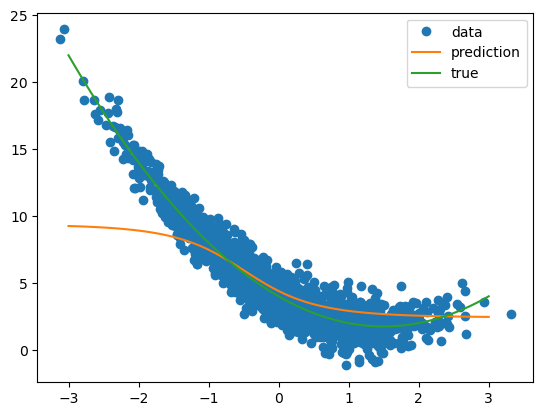

In [4]:
import matplotlib.pyplot as plt
xnew = np.linspace(-3, 3, 100).reshape(-1, 1)
ynew = FFNN.predict(xnew)

plt.plot(x, y, 'o', label='data')
plt.plot(xnew, ynew, label='prediction')
plt.plot(xnew, simple_poly(xnew), label='true')
plt.legend()
plt.show()


In [5]:
from Schedules import Adam

dimension = (1, 5, 5, 5, 1)
scheduler = Adam(0.01, 0.9, 0.999)
FFNN = NeuralNet(dimension, seed=2023, output_func=lambda x: x)

scores = FFNN.fit(x, y, scheduler, batches=25, epochs=400, lmbda=0.2)

100%|██████████| 10000/10000 [00:08<00:00, 1201.94it/s]


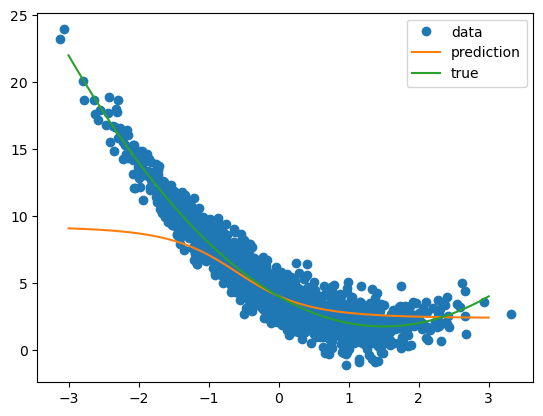

In [6]:
xnew = np.linspace(-3, 3, 100).reshape(-1, 1)
ynew = FFNN.predict(xnew)

plt.plot(x, y, 'o', label='data')
plt.plot(xnew, ynew, label='prediction')
plt.plot(xnew, simple_poly(xnew), label='true')
plt.legend()
plt.show()

In [7]:
from Activators import RELU

dimension = (1, 20, 20, 20, 1)
scheduler = Adam(0.01, 0.9, 0.999)
FFNN = NeuralNet(dimension, seed=2023, output_func=lambda x: x, hidden_func=RELU)

scores = FFNN.fit(x, y, scheduler, batches=25, epochs=400, lmbda=0.2)

100%|██████████| 10000/10000 [00:06<00:00, 1531.99it/s]


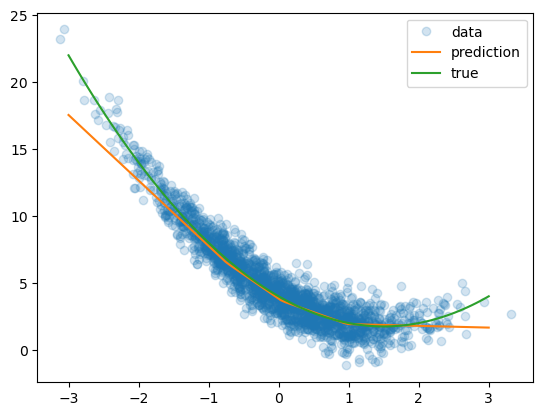

In [8]:
xnew = np.linspace(-3, 3, 100).reshape(-1, 1)
ynew = FFNN.predict(xnew)

plt.plot(x, y, 'o', label='data', alpha=0.2)
plt.plot(xnew, ynew, label='prediction')
plt.plot(xnew, simple_poly(xnew), label='true')
plt.legend()
plt.show()

In [9]:
from Activators import LRELU

dimension = (1, 20, 20, 20, 1)
scheduler = Adam(0.01, 0.9, 0.999)
FFNN = NeuralNet(dimension, seed=2023, output_func=lambda x: x, hidden_func=LRELU)

scores = FFNN.fit(x, y, scheduler, batches=25, epochs=400, lmbda=0.2)

100%|██████████| 10000/10000 [00:05<00:00, 1764.70it/s]


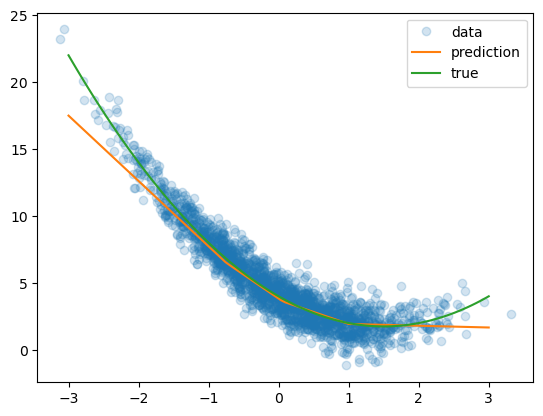

In [10]:
xnew = np.linspace(-3, 3, 100).reshape(-1, 1)
ynew = FFNN.predict(xnew)

plt.plot(x, y, 'o', label='data', alpha=0.2)
plt.plot(xnew, ynew, label='prediction')
plt.plot(xnew, simple_poly(xnew), label='true')
plt.legend()
plt.show()

In [11]:
import autograd.numpy as np

def FrankeFunction(x: np.ndarray, y: np.ndarray) -> np.ndarray:
    """Franke's function for evaluating methods.

    inputs:
        x (np.array): values in x direction

        y (np.array): values in y direction

    returns:
        (np.array) values in z direction
    """

    term1 = 0.75 * np.exp(-(0.25 * (9 * x - 2) ** 2) - 0.25 * ((9 * y - 2) ** 2))
    term2 = 0.75 * np.exp(-((9 * x + 1) ** 2) / 49.0 - 0.1 * (9 * y + 1))
    term3 = 0.5 * np.exp(-((9 * x - 7) ** 2) / 4.0 - 0.25 * ((9 * y - 3) ** 2))
    term4 = -0.2 * np.exp(-((9 * x - 4) ** 2) - (9 * y - 7) ** 2)
    return term1 + term2 + term3 + term4

In [12]:
x = np.linspace(0, 1, 10)
y = np.linspace(0, 1, 10)
x_, y_ = np.meshgrid(x, y)
x = x_.ravel().reshape(-1, 1)
y = y_.ravel().reshape(-1, 1)

z = FrankeFunction(x, y) # + np.random.randn(100, 100) * 0.1

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

xnew = np.linspace(0, 1, 100)
ynew = np.linspace(0, 1, 100)
xnew, ynew = np.meshgrid(xnew, ynew)
znew = FFNN.predict(np.c_[xnew.ravel().reshape(-1, 1), ynew.ravel().reshape(-1, 1)]).reshape(100, 100)

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection="3d")
surf = ax.plot_surface(
    x_,
    y_,
    z,
    cmap=cm.coolwarm,
    linewidth=0,
    antialiased=False,
)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.set_title("Input data")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection="3d")
surf = ax.plot_surface(
    xnew,
    ynew,
    znew,
    cmap=cm.coolwarm,
    linewidth=0,
    antialiased=False,
)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.set_title("Output data")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

fig.suptitle("Franke's function")

plt.tight_layout()


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)

In [14]:
x = np.linspace(-2, 5, 1000).reshape(-1, 1)
y = simple_poly(x)

from Activators import RELU

dimension = (1, 25, 1)
scheduler = Adam(0.01, 0.9, 0.999)
FFNN = NeuralNet(dimension, seed=2023, output_func=lambda x: x, hidden_func=RELU)

scores = FFNN.fit(x, y, scheduler, batches=25, epochs=200, lmbda=0.2)

100%|██████████| 5000/5000 [00:02<00:00, 2033.69it/s]


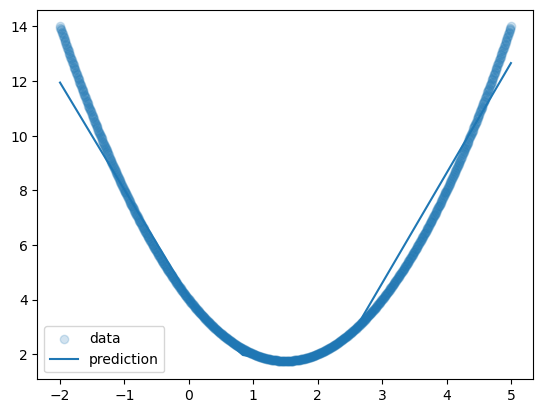

In [15]:
ypred = FFNN.predict(x)

plt.scatter(x, y, label='data', alpha=0.2)
plt.plot(x, ypred, label='prediction')
plt.legend()
plt.show()

In [16]:
ypred.shape

(1000, 1)

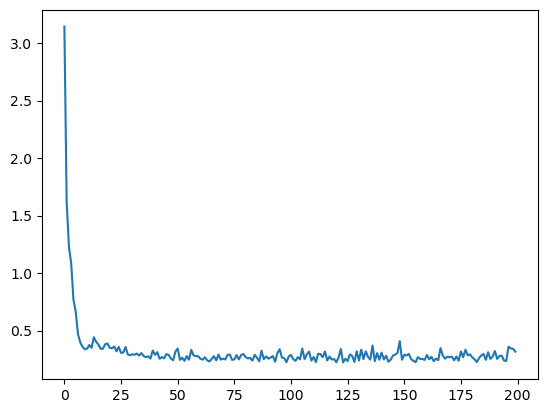

In [17]:

accuracy = np.array(scores['train_errors'])
t = np.arange(accuracy.shape[0])
plt.plot(t, accuracy[t])

In [18]:
scores.keys()

dict_keys(['train_errors'])

In [19]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
x_, y_ = np.meshgrid(x, y)
x = x_.ravel().reshape(-1, 1)
y = y_.ravel().reshape(-1, 1)

In [20]:

def design_poly(x, y, dim):
    x = x.ravel()
    y = y.ravel()
    X = np.zeros((x.shape[0], dim * (dim + 1) // 2))
    k = 0
    for i in range(dim):
        for j in range(i+1):
            X[:, k] = x**(i-j) * y**j
            k += 1
    return X

X = design_poly(x, y, 10)
X.shape

(10000, 55)

In [21]:
from Activators import sigmoid
from sklearn.preprocessing import StandardScaler

z = FrankeFunction(x, y) # + np.random.randn(100, 100) * 0.1
scaler = StandardScaler()
z = scaler.fit_transform(z)
scheduler = Adam(0.01, 0.9, 0.999)
FFNN = NeuralNet((55, 55, 1), seed=2023, output_func=lambda x: x, hidden_func=sigmoid)
scores = FFNN.fit(X, z, scheduler, batches=25, epochs=400, lmbda=0.2)

100%|██████████| 10000/10000 [00:30<00:00, 330.55it/s]


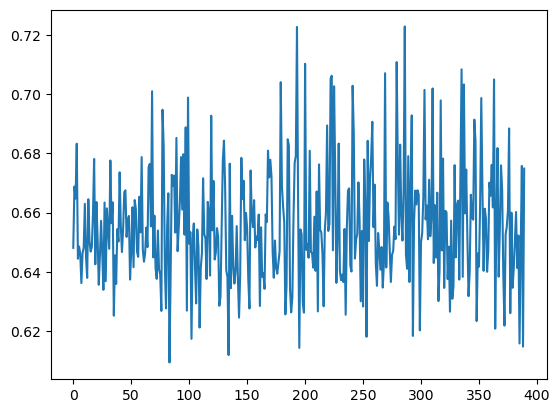

In [22]:
plt.plot(scores['train_errors'][10:])

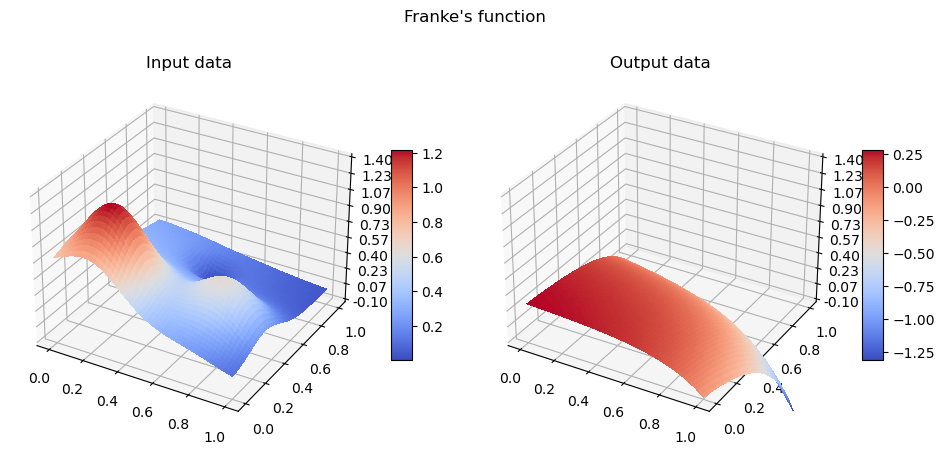

In [23]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

znew = FFNN.predict(X)

fig = plt.figure(figsize=plt.figaspect(0.5))

ax = fig.add_subplot(1, 2, 1, projection="3d")
surf = ax.plot_surface(
    x_,
    y_,
    FrankeFunction(x_, y_),
    cmap=cm.coolwarm,
    linewidth=0,
    antialiased=False,
)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.set_title("Input data")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

ax = fig.add_subplot(1, 2, 2, projection="3d")
surf = ax.plot_surface(
    x_,
    y_,
    znew.reshape(100, 100),
    cmap=cm.coolwarm,
    linewidth=0,
    antialiased=False,
)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter("%.02f"))
ax.set_title("Output data")

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=10)

fig.suptitle("Franke's function")

plt.tight_layout()
